In [87]:
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import preprocessing as prep

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
X, y= prep.load_lstm_data('../data/S_data_2019_04_14/', 'train climatewohnzimmer', 143, 3, False)

(858, 13)


In [68]:
model = torch.load('../experiments/exp1/' + 'LSTM1' + '.pt')

In [69]:
model

Lstm(
  (rnn): LSTM(13, 256, num_layers=2)
  (out): Linear(in_features=256, out_features=6, bias=True)
)

In [70]:
X = torch.from_numpy(X).to(model.device).type(model.dtype)

In [71]:
X.shape

torch.Size([119, 143, 13])

In [72]:
model.hidden = model.init_hidden(X.shape[1],256)
output = model(X)

In [73]:
output.shape

torch.Size([119, 143, 6])

In [74]:
pred = output.detach()[:,-1,:]

In [75]:
pred.shape

torch.Size([119, 6])

In [76]:
real = pd.DataFrame(X[:,-1,:].numpy())

In [77]:
y.shape

(119, 6)

In [78]:
y[1]

array([20.1, 19.9, 20.1, 20.1, 20.1, 19.9])

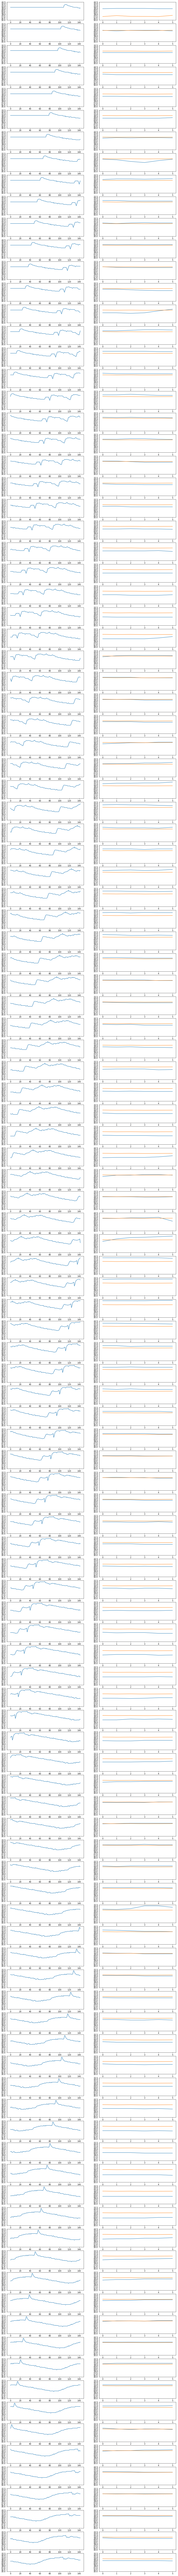

In [92]:
for i in range(len(y)): 
    figure = plt.figure(1, figsize=(16, 250))
    #figure.set_yticks(np.arange(16, 23, 0.5))
    ax1 = plt.subplot(len(y),2,(i+1)*2-1)
    ax1.plot(X[i,:,0].numpy())
    ax1.set_yticks(np.arange(16, 23, 0.5))
    ax2 = plt.subplot(len(y),2,(i+1)*2)
    ax2.plot(y[i])
    ax2.plot(pred.numpy()[i,:])
    ax2.set_yticks(np.arange(16, 23, 0.5))

    #plt.legend(['y','X']);

In [49]:
pred.shape

torch.Size([11, 60])